In [1]:
from modsim import *
%matplotlib inline


def update1(state, system):
    """Update the SIR model.
    
    state: State (s, i, r)
    system: System object
    
    returns: State (sir)
    """
    unpack(system)
    s, i, r = state

    infected = beta * i * s    
    recovered = gamma * i
    
    s -= infected
    i += infected - recovered
    r += recovered
    
    return State(S=s, I=i, R=r)

def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.loc[t0] = init
    
    for i in linrange(t0, t_end):
        frame.loc[i+1] = update_func(frame.loc[i], system)
    
    system.results = frame

def make_system(beta, gamma):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(S=78, I=2, R=0)
    init /= np.sum(init)

    t0 = 0
    t_end = 6 * 30

    return System(init=init, t0=t0, t_end=t_end,
                  beta=beta, gamma=gamma)

def plot_results(S, I, R):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(R, ':', color='green', label='Resistant')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')
    
def calc_total_infected(system):
    """Fraction of population infected during the simulation.
    
    system: System object with results.
    
    returns: fraction of population
    """
    frame = system.results
    return frame.S[system.t0] - frame.S[system.t_end]


In [2]:
system = make_system(0.333, 0.1)
run_simulation(system, update1)
system.results.head()

,S,I,R
0,0.975000,0.025000,0.000000
1,0.966883,0.030617,0.002500
2,0.957025,0.037413,0.005562
3,0.945102,0.045595,0.009303
4,0.930753,0.055385,0.013862


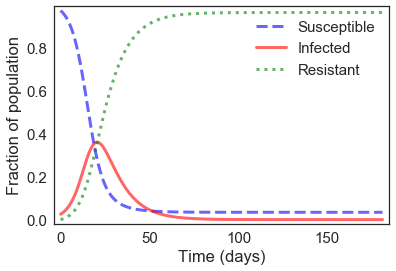

In [3]:
frame = system.results
plot_results(frame.S, frame.I, frame.R)

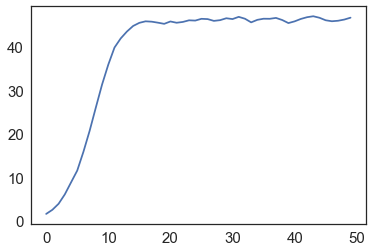

In [77]:
from collections import namedtuple
from random import shuffle
import random

class Student:
    def __init__(self, gender, activity, infected, cured, infection_date):
        self.gender = gender
        self.activity = activity
        self.infected = infected
        self.cured = cured
        self.infection_date = infection_date
        
#Student = namedtuple('Student', 'gender activity infected cured')

        
def create_student_body(size):
    half_size = int(size/2)
    student_body = [[],[]]
    for i in range(half_size):
        student_body[0].append(Student('male', '0.5', 'no', 'no', -1))
    for i in range(half_size, size):
        student_body[1].append(Student('female', '0.5', 'no', 'no',-1 ))
    return student_body
        

def match(student_body, protection_rate, week):
    matches = list(zip(student_body[0], student_body[1]))
    #print(matches)
    for i in range(40):
        if (matches[i][0].infected != 'no' or matches[i][1].infected != 'no'):
            #print("infected!!!!")
            if (matches[i][0].infected == 'no'):
                student_body[0][i].infection_date = week
                #print(week)
            if (matches[i][1].infected == 'no'):
                student_body[1][i].infection_date = week
            random.seed()
            if (random.random() > protection_rate):
                student_body[0][i].infected = student_body[1][i].infected = 'yes'
                
    shuffle(student_body[0])
    shuffle(student_body[1])
    return student_body
            


weeks = 50

master_infected_list = []
tests = 200
for x in range(tests):
    infected_list=[]
    student_body = create_student_body(80)
    student_body[0][0].infected = 'yes'
    student_body[0][0].infection_date = 1
    for i in range(weeks):
        student_body = match([[Student(s.gender, s.activity, s.infected, s.cured, s.infection_date) for s in student_body[0]],
                           [Student(s.gender, s.activity, s.infected, s.cured, s.infection_date) for s in student_body[1]]],
                            0.4, i)
        infected = 0
        #print(student_body)
        for stu in student_body[0]:
            if (i - stu.infection_date > 3 and stu.infection_date != -1):
                stu.infected = 'no'
                stu.infection_date = -1
                #print("cured!")
            if stu.infected != 'no':
                infected += 1
        for stu in student_body[1]:
            #print(stu.infection_date)
            if (i - stu.infection_date > 3 and stu.infection_date != -1):
                stu.infected = 'no'
                stu.infection_date = -1
                #print("cured!")
            if stu.infected != 'no':
                infected += 1
        #print(infected)
        infected_list.append(infected)
        #print(i) 
    #print(infected_list)
    master_infected_list.append(infected_list)

avg_infect = [float(sum(col))/len(col) for col in zip(*master_infected_list)]
#mast_infect = np.array(master_infected_list)
#avg_infect = np.mean(mast_infect, axis=1).tolist()


plt.plot(avg_infect)
#def spread_dis(system):
#    system.unpack()
#    male.a